In [1]:
import pickle
from PIL import Image
import os
import sys

notebook_dir = os.getcwd()
project_root_path = os.path.dirname(notebook_dir)
sys.path.insert(0, project_root_path)

from src.config import PROJECT_ROOT

In [2]:
file_path = os.path.join(PROJECT_ROOT, 'data', 'RIVAL10', 'train', 'ordinary', 'n01531178_n01531178_3410_attr_dict.pkl')

# Load the .pkl file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Print or inspect the loaded data

print(data)

{'entire-object': 'iVBORw0KGgoAAAANSUhEUgAAAY8AAAH0AQMAAAD/sTOmAAAAAXNSR0IB2cksfwAAAAZQTFRFAAAALKAsCO/WQQAAAAJ0Uk5TAP9bkSK1AAAE+UlEQVR4nO3cPXLrOBAEYKkUKNQRcBRcazPgaDgKjrDhBq7HtfVDUkCzZ5qStcFiQtf7bKmnDempSB8OY8aMGTNmzJgxY8aMGTNmzJgx/7+5FJmEf2QSp6ySafpbFMdp+iOS8zRNVSOXb/KlkfhNpiKR9EO0nKfrKOJ0I0rO5xtRcg43ouQc70TI+S6ER3bUyelB/DFfZpK9JOgkzaR4ySzci1mevbsyZ50sgbn7HxfibcwSmHf9x0kmq8C8jbmsSXaRoJO4JsVF1sLXmOMTca3/rJOnwHyNeQrM15iokyfhasxzYK7GnBqSbXLRSWhIsUlsSLVJkkkbmKMxbWCOxpxbYq+/DcxB2sAcjWkDsxvTBWavvwvMJl1gNmlL6SBdYDbpAzNJL6yQQWAWAYFZpA+sGOIdv5LZJmrAoJT2D2kDc5yubWAOEhriOPbbwByvR+2zt8mOY69rWDVJ1zCbtIE5XiiiTlphV6w/9swf0v8Wm6QLzK5YF9iO1wmbdE/FrFgfmFmxPjCT9MdetUgXmH7sOUjqSDbEe15YrcfVB2ZWrH+dMEmfsVmxPmOzYn3GJukDsyoG1lINAtZiEfDyXQwC3u9YpM94z/sdQ+x4vwMytioGMrYqBjK2CMjYqljoiVWxqJPUk2qQXlh9AWuxCHrnmjlB71wNAtZiVSz0wqpY1Al4XEbFUMZGxVDGBkEZGxVDGVdOQMYWARlbFUs6AcKoGFqLUTG0FoOgtRgVQ2sxKhZ0EgExKpYA4RWDGXMCM66UoIyNvqCMDYIyNiqGMjYIytioGBK8YnAtnMC18IrBtfCKwbVwEhDhFYuIVEqSTpDgFYNr4X2Ba+EEroVXDBLeF7hJTgIivGIREd6Xp

In [3]:
print(data.keys())

dict_keys(['entire-object', 'tail', 'wings', 'beak', 'patterned'])


In [16]:
import base64
import io


for concept_name, base64_string in data.items():
    # Decode the Base64 string
    image_data = base64.b64decode(base64_string)

    # Create an image object from the bytes
    image = Image.open(io.BytesIO(image_data))

    # You can now display it (if in a Jupyter notebook, for example)
    print(concept_name)
    # image.show()

entire-object
tail
wings
beak
patterned


In [5]:
import numpy as np

TRAIN_PATH = os.path.join(PROJECT_ROOT, 'data', 'RIVAL10', 'train', 'ordinary')
file_path = os.path.join(TRAIN_PATH, 'n04552348_n04552348_27896_attr_labels.npy')

npy_data = np.load(file_path)

# Print or inspect the loaded data
print(npy_data)

[[0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


# Concept Encoding

In [6]:
TRAIN_IMG_PATH = os.path.join(PROJECT_ROOT, 'images', 'RIVAL10', 'train', 'images')

train_mapping = {}

idx = 0
for filename in os.listdir(TRAIN_IMG_PATH):
    if '.JPEG' in filename and '_mask' not in filename:
        train_mapping[idx] = filename.replace('.JPEG', '')
        idx += 1

TEST_IMG_PATH = os.path.join(PROJECT_ROOT, 'images', 'RIVAL10', 'test', 'images')

test_mapping = {}

idx = 0
for filename in os.listdir(TEST_IMG_PATH):
    if '.JPEG' in filename and '_mask' not in filename:
        test_mapping[idx] = filename.replace('.JPEG', '')
        idx += 1

In [7]:
# print(data)
len(train_mapping), len(test_mapping)

(21098, 5286)

In [8]:
def get_concept_matrix(mapping, dir_path):
    concept_matrix = np.zeros((len(mapping), 18))

    for idx, instance in mapping.items():
        concept_path = os.path.join(dir_path, instance + '_attr_labels.npy')

        concept_data = np.load(concept_path)

        concept_matrix[idx] = concept_data[0]

    return concept_matrix

In [9]:
train_concept_matrix = get_concept_matrix(train_mapping, TRAIN_PATH)

In [10]:
TEST_PATH = os.path.join(PROJECT_ROOT, 'data', 'RIVAL10', 'test', 'ordinary')

test_concept_matrix = get_concept_matrix(test_mapping, TEST_PATH)

# Label encoding


In [11]:
import json

def encode_labels_dict(classes_file, mapping):

    # Load the JSON file
    with open(classes_file, 'r') as f:
        wnid_data = json.load(f)

    # Extract the first part of the keys in mapping for comparison
    mapping_wnids = {key: value.split('_')[0] for key, value in mapping.items()}

    classes_dict = {}

    for idx, wnid in mapping_wnids.items():
        classes_dict[idx] = wnid_data[wnid]

    return classes_dict

classes_file = os.path.join(PROJECT_ROOT, 'data', 'RIVAL10', 'meta', 'wnid_to_class.json')
classes_train = encode_labels_dict(classes_file, train_mapping)

In [12]:
super_classes_file = os.path.join(PROJECT_ROOT, 'data', 'RIVAL10', 'meta', 'label_mappings.json')

# Load the JSON file
with open(super_classes_file, 'r') as f:
    class_to_super_class = json.load(f)


# class_to_super_class
super_classes_train = {}

for idx, curr_class in classes_train.items():
    super_classes_train[idx] = class_to_super_class[curr_class][0]


In [13]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Example dictionary
# example_dict = {0: 'cat', 1: 'dog', 2: 'bird', 3: 'cat'}

# Extract the values (categories) from the dictionary
categories = list(super_classes_train.values())

# Reshape the data to a 2D array as required by OneHotEncoder
categories_array = np.array(categories).reshape(-1, 1)

# Initialize and fit the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(categories_array)

print(one_hot_encoded.shape)


(21098, 10)


In [14]:
# concept processing
from src.preprocessing.concept_processing import compute_class_level_concepts


class_level_concepts = compute_class_level_concepts(train_concept_matrix, None, one_hot_encoded)

RIVAL10_PATH = os.path.join(PROJECT_ROOT, 'output', 'RIVAL10')
os.makedirs(RIVAL10_PATH, exist_ok=True)
np.save(os.path.join(RIVAL10_PATH, 'class_level_concepts.npy'), class_level_concepts)

File name: n03673027_n03673027_7137
Of class:  ocean liner
Of super class:  ship
Has concepts:  ['entire-object', 'rectangular', 'metallic', 'wet', 'tall', 'long']
Concept vector:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]


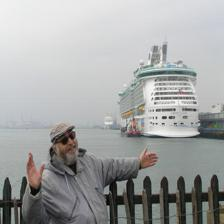

In [15]:
idx = 13

print('File name:', train_mapping[idx])
print("Of class: ", classes_train[idx])
print("Of super class: ", super_classes_train[idx])

file_path = os.path.join(TRAIN_PATH, train_mapping[idx] + '_attr_dict.pkl')
img_path = os.path.join(TRAIN_IMG_PATH, train_mapping[idx] + '.JPEG')

# Load the .pkl file
with open(file_path, 'rb') as file:
    concepts = pickle.load(file)

print("Has concepts: ", list(concepts.keys()))
print("Concept vector: ", train_concept_matrix[idx])

Image.open(img_path)

# Image Processing

In [17]:
from PIL import Image
import os
from tqdm import tqdm

import torchvision.transforms as transforms
import math

from src.utils import *


def _get_transform_pipeline(use_training_transforms, resol, resnet=False):
    # resized_resol - resizes to slightly larger to ensure image is large enough before cropping to resol
    resized_resol = int(resol * 256/224) # 299 * 256/224 = 341.7
    if resnet:
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
    else: # shifts from [0.0, 1.0] -> [-0.25, 0.25]
        mean = [0.5,0.5,0.5]
        std = [2,2,2]
    if use_training_transforms:
        # print("Using TRAINING transformations:")
        return transforms.Compose([
            transforms.ColorJitter(brightness=32/255, saturation=(0.5, 1.5)),
            transforms.RandomResizedCrop(resol),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean = mean, std = std)
            ])
    # Use LANCZOS resampling for better quality
    # print("Using VALIDATION/TEST transformations:")
    return transforms.Compose([
        transforms.Resize(resized_resol, interpolation=transforms.InterpolationMode.LANCZOS),
        transforms.CenterCrop(resol),
        transforms.ToTensor(), # divide by 255, convert from [0,255] -> [0.0,1.0]
        transforms.Normalize(mean = mean, std = std)
        ])


def _get_all_filenames(input_dir, all_img_names):
    all_image_paths = []

    for img_name in all_img_names:
        all_image_paths.append(os.path.join(input_dir, img_name+'.JPEG'))

    return all_image_paths


def _get_filename_from_path(path):
    parent_folder = os.path.basename(os.path.dirname(path))
    filename = os.path.basename(path)
    return os.path.join(parent_folder, filename)


def load_and_transform_images(input_dir, resol, use_training_transforms, all_img_names, batch_size = 64, resnet=False, verbose = False):
    transform_pipeline = _get_transform_pipeline(use_training_transforms, resol, resnet)

    # Get all image paths
    all_image_paths = _get_all_filenames(input_dir, all_img_names)

    vprint(f"Found {len(all_image_paths)} images.", verbose)
    num_batches = math.ceil(len(all_image_paths) / batch_size)
    vprint(f"Processing in {num_batches} batches of size {batch_size} (for progress reporting)...", verbose)

    all_transformed_tensors = []
    all_processed_paths = []
    processed_count = 0

    for i in tqdm(range(num_batches), desc="Processing batches", disable=not verbose):
        batch_paths = all_image_paths[i * batch_size : (i + 1) * batch_size]

        for img_path in batch_paths:
            img = Image.open(img_path).convert('RGB')
            # Apply transformations
            transformed_img_tensor = transform_pipeline(img)
            # Append the tensor and its path to the lists
            all_transformed_tensors.append(transformed_img_tensor)
            img_path = _get_filename_from_path(img_path)
            all_processed_paths.append(img_path)
            processed_count += 1

    vprint(f"\nFinished processing.", verbose)
    vprint(f"Successfully transformed: {processed_count} images.", verbose)

    # Return the list of all tensors and their paths
    return all_transformed_tensors, all_processed_paths


In [18]:
train_images = load_and_transform_images(TRAIN_IMG_PATH, 224, True, train_mapping.values(), verbose=True)

Found 21098 images.
Processing in 330 batches of size 64 (for progress reporting)...


Processing batches:  56%|█████▌    | 184/330 [00:26<00:21,  6.91it/s]


KeyboardInterrupt: 

In [ ]:
import pickle
import os
import numpy as np
from src.config import PROJECT_ROOT

# First, let's understand the structure of the concept matrix
print(f"Concept matrix shape: {train_concept_matrix.shape}")  # Should be (num_samples, num_concepts)

# Now, get a comprehensive list of all concepts by sampling multiple files
TRAIN_PATH = os.path.join(PROJECT_ROOT, 'data', 'RIVAL10', 'train', 'ordinary')

# Sample a few images to collect all possible concepts
all_concepts = set()
sample_count = min(20, len(train_mapping))  # Sample up to 20 images or all if fewer

print(f"Sampling {sample_count} images to identify all concepts...")
for i in range(sample_count):
    idx = list(train_mapping.keys())[i]
    instance_name = train_mapping[idx]
    concept_path = os.path.join(TRAIN_PATH, instance_name + '_attr_dict.pkl')

    with open(concept_path, 'rb') as f:
        concept_dict = pickle.load(f)
        all_concepts.update(concept_dict.keys())

# Print all unique concepts found across the sampled images
print(f"\nFound {len(all_concepts)} unique concepts across the dataset:")
for idx, concept_name in enumerate(sorted(all_concepts)):
    print(f"{idx+1}. {concept_name}")

# Verify this matches the concept matrix dimensions
print(f"\nConcept matrix has {train_concept_matrix.shape[1]} columns, which should match the number of concepts.")

Concept matrix shape: (21098, 18)
Sampling 20 images to identify all concepts...

Found 18 unique concepts across the dataset:
1. beak
2. colored-eyes
3. ears
4. entire-object
5. floppy-ears
6. hairy
7. horns
8. long
9. long-snout
10. metallic
11. patterned
12. rectangular
13. tail
14. tall
15. text
16. wet
17. wheels
18. wings

Concept matrix has 18 columns, which should match the number of concepts.


In [ ]:
# ears, hairy, wings, wet, wheels, metallic